<div style='text-align:center;
            text-decoration: overline;
            font-size: 18px;
            margin: 33px 0'>Анализ поездок Uber такси</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import warnings
warnings.filterwarnings('ignore')

<div style='font-size:15px; text-align: center; margin: 12px'>
        <span style=''>Набор данных, который я здесь использую</span>,<br>основан на поездках Uber в Нью-Йорке, городе с очень сложной транспортной системой.</div>
            

In [2]:
# данные
data = pd.read_csv('uber-raw-data-sep14.csv')
data = data.rename(columns = {'Lat' : 'Широта', 
                       'Lon' : 'Долгота', 
                       'Date/Time' : 'Дата', 
                       'Base' : 'Код'}) 

In [3]:
data.head(3)

,Дата,Широта,Долгота,Код
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512


<p style='font-size:15px; text-align: center; margin-top: 22px;'>Имеем данные за сентябрь: дата–время, широта, долгота, код вызова</p>
    <div style='font-size:21px; text-align: center;line-height: 40%;'>.<br>.<br>.</div>
    <p style='font-size:15px; text-align: center; margin-bottom: 22px;'>Подготовим данные для анализа поездок Uber по дням и часам:</p>

In [4]:
# формат даты
data['Дата'] = pd.to_datetime(data['Дата'], format='%m/%d/%Y %H:%M:%S') 
# разбиваем дату
data["День"] = data["Дата"].apply(lambda x: x.day)
data["Неделя"] = data["Дата"].apply(lambda x: x.weekday())
data["Час"] = data["Дата"].apply(lambda x: x.hour)

In [5]:
data.head()

,Дата,Широта,Долгота,Код,День,Неделя,Час
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


<div style='font-size:16px; text-align: center;margin: 33px'>Далее посмотрим на динамику ежедневных поездок. 
</div>
    

Text(0, 0.5, 'Количество заказов')

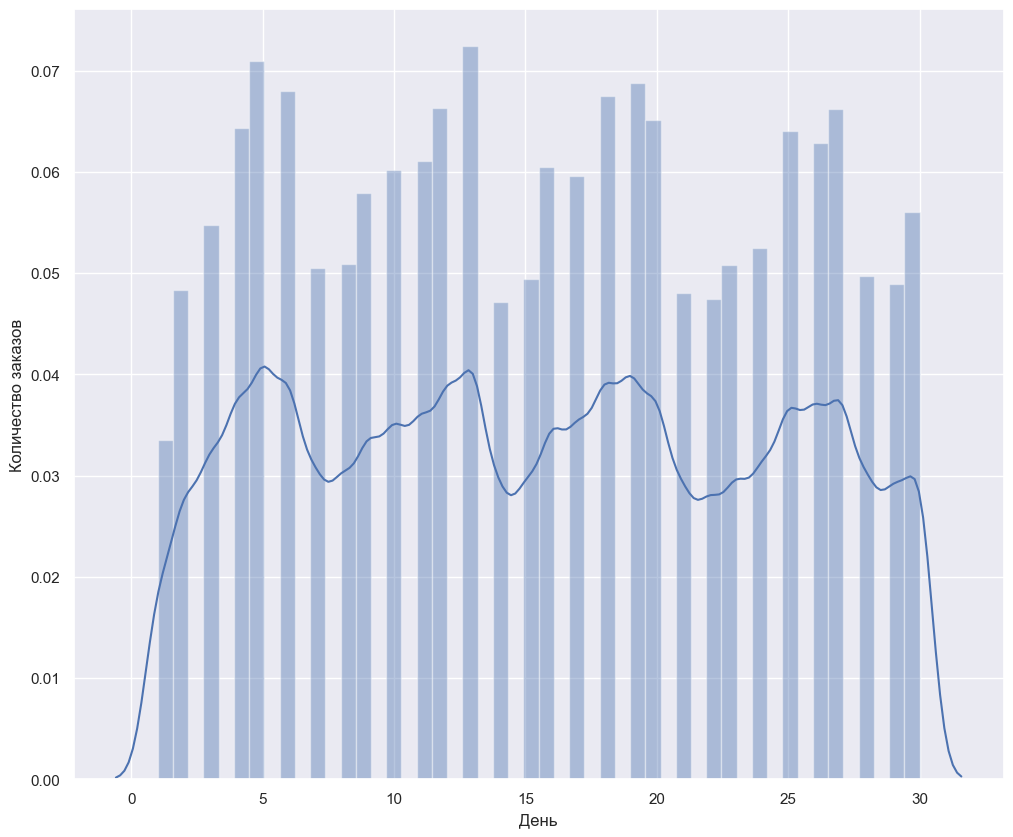

In [6]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["День"])
plt.ylabel("Количество заказов")

<div style='font-size:16px; text-align: center;margin: 34px 0'>Видим, что количество поездок растет в рабочие дни и уменьшется в выходные.<br>Далее проведём анализ по времени:
    
    
</div>
    

Text(0, 0.5, 'Количество заказов')

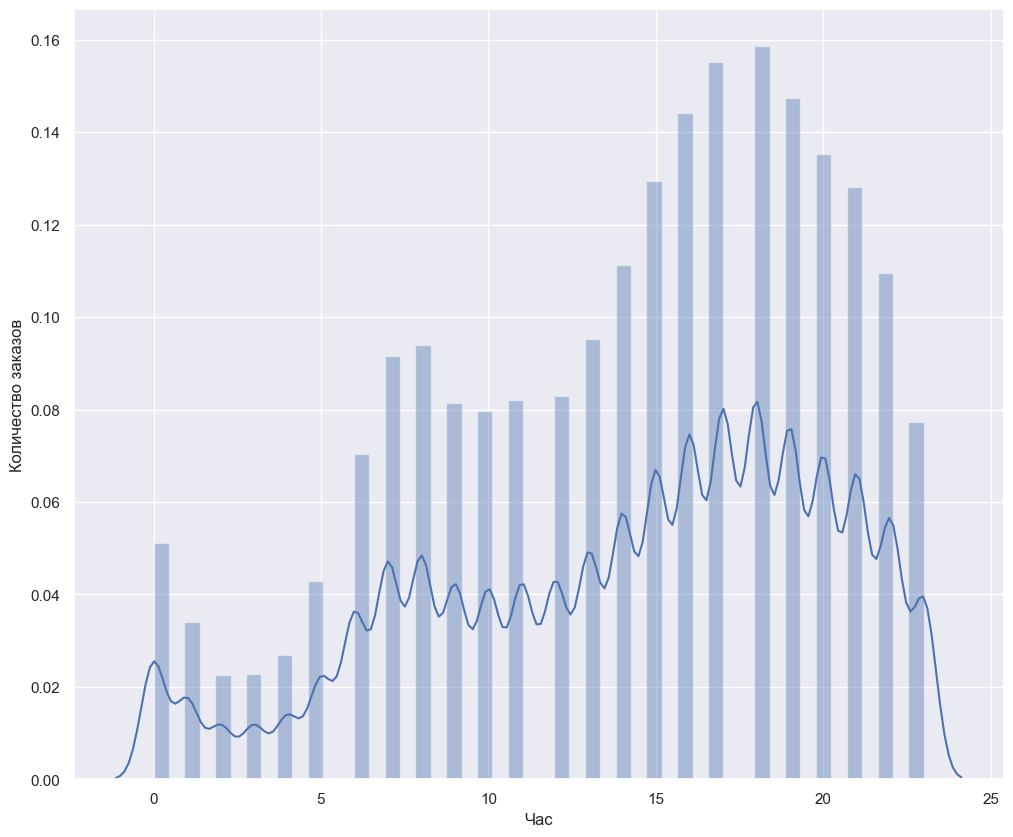

In [7]:
sns.distplot(data["Час"])
plt.ylabel("Количество заказов")

<div style='font-size:16px; text-align: center;margin: 34px 0'>
    На графике выше видим, что количество поездок уменьшается после полуночи. А затем увеличиваться после 5 утра и до 6 часов вечера. То есть 18:00 — самый загруженный час для Uber.<br> 
    Теперь проанализируем поездки Uber по дням недели:
</div>

Text(0, 0.5, 'Количество заказов')

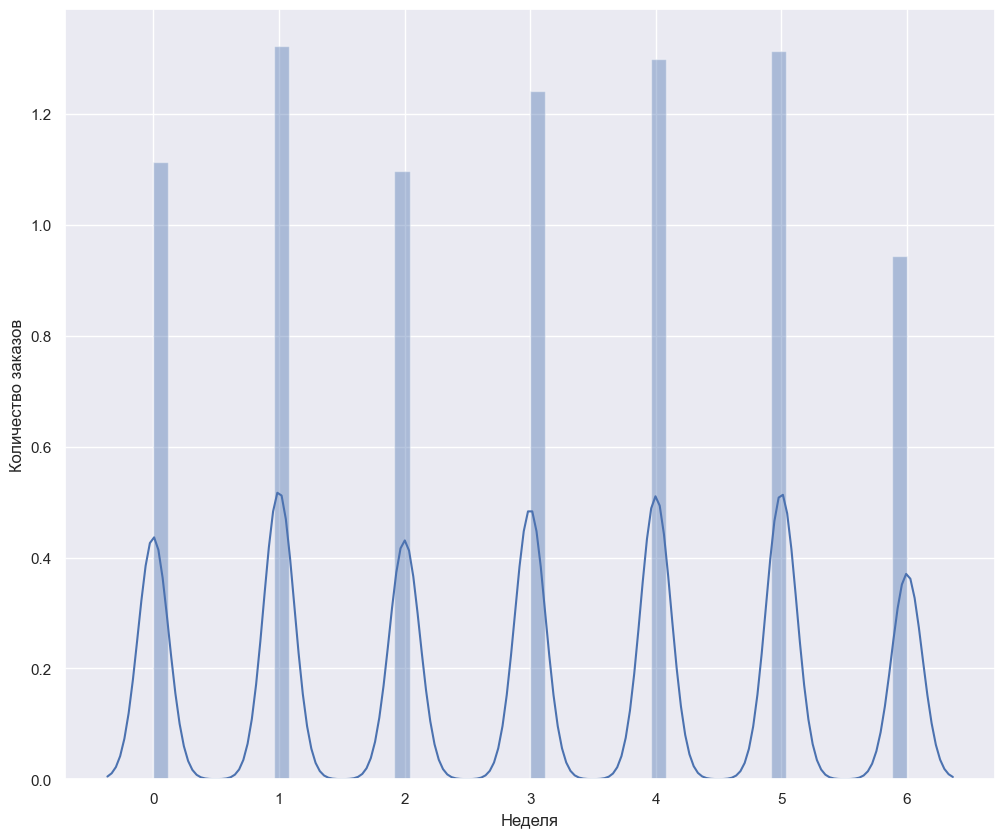

In [8]:
sns.distplot(data["Неделя"])
plt.ylabel("Количество заказов")

<div style='font-size:16px; text-align: center;margin: 34px 0'>
   На приведенном выше рисунке 0 означает воскресенье, по воскресеньям количество поездок Uber больше чем по субботам, поэтому мы можем сказать, что люди также используют Uber для прогулок, а не просто для работы. По субботам видим наименьшее количество поездок Uber, а по понедельникам — максимальное. <br>Теперь давайте посмотрим на соотношение часов и дней недели в поездках Uber:
</div>

<AxesSubplot:xlabel='Час', ylabel='Неделя'>

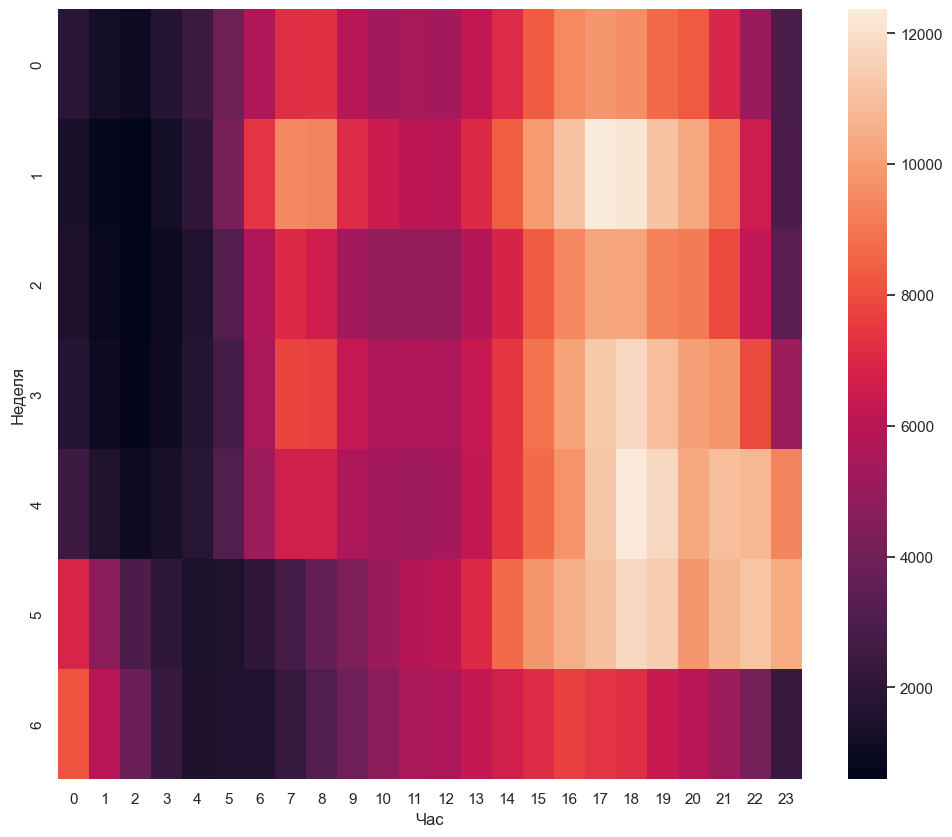

In [9]:
df = data.groupby(["Неделя", "Час"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

<div style='font-size:16px; text-align: center;margin: 34px 0'> Построим график плотности поездок по имеющимся  долготе и широте:
</div>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


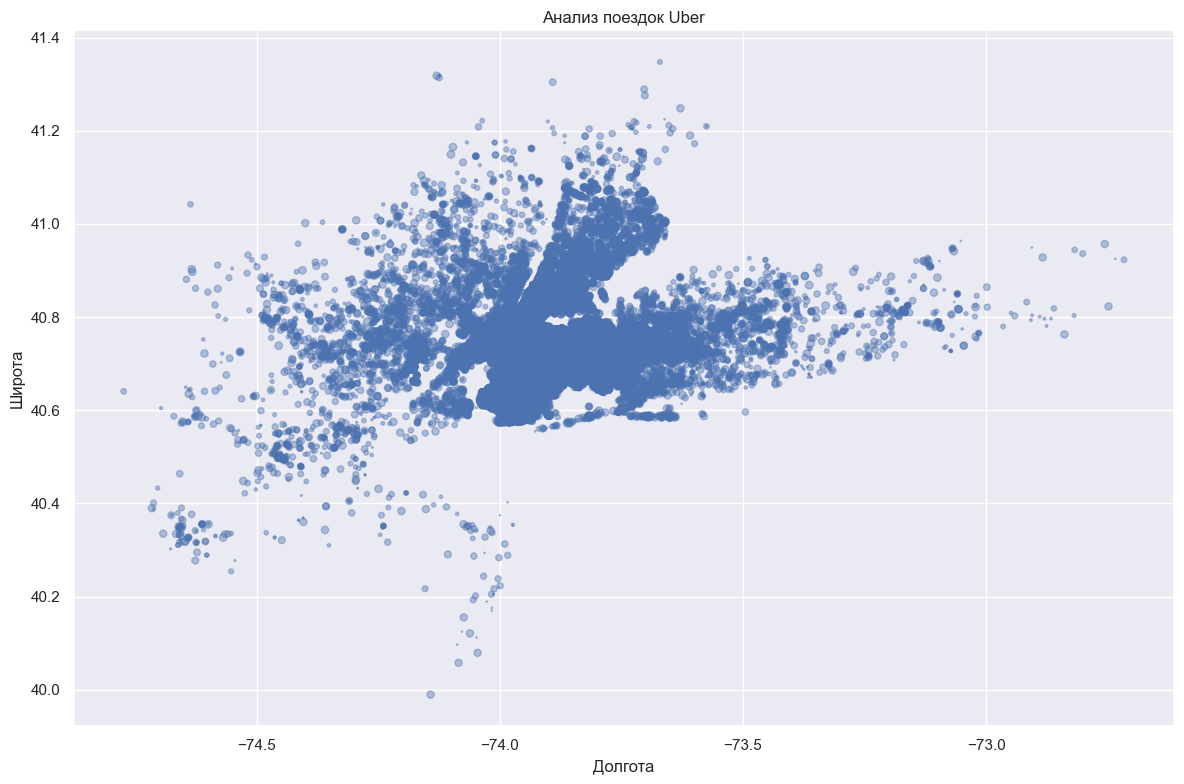

In [10]:
data.plot(kind='scatter', x='Долгота', y='Широта', alpha=0.4, s=data['День'], 
figsize=(12, 8))
plt.title("Анализ поездок Uber")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.tight_layout()


<div style='font-size:16px; text-align: center;margin: 34px 0'>
<div style='margin: auto; margin-bottom: 35px'>Некоторые из выводов, которые я сделала из этого анализа:</div>
<div style='padding-top: 5px; height: 31px; width: 55%; margin: auto; background: #eee2df; color:#463f3a'>
    Понедельник - самый прибыльный день для Uber.</div>
<div style='padding-top: 5px; height: 31px; width: 55%; margin: auto; margin-top:7px;background: #c89f9c; color:#463f3a'>По субботам меньше людей пользуются Uber.</div>
<div style='padding-top: 5px; height: 31px; width: 55%; margin: auto; margin-top:7px;background: #f4f3ee; color:#463f3a'>Самый загруженный час – 18:00</div>
<div style='padding-top: 5px; height: 31px; width: 55%; margin: auto; margin-top:7px;background: #bcb8b1; color:#463f3a'>С 5 утра и до 6 вечера идёт рост количества поездок.</div>
<div style='padding-top: 5px; height: 31px; width: 99%; margin: auto; margin-top:7px;background: #8a817c; color:#000'>Большинство поездок Uber совершаются недалеко от района Манхэттен в Нью-Йорке.</div>
</div>
